In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos


iris = load_iris()
X = iris.data
y = iris.target



# Train test split


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

# Scale and Transform Data

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=1)
knn_classifier.fit(X_train, y_train)
y_pred_test = knn_classifier.predict(X_test)


# Accuracy


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_test))


Accuracy: 0.9210526315789473


# Cross Validation


In [7]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits=10)
modelCV = knn_classifier
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
#Common choices for k include 5, 10, and sometimes 3.
#Smaller values of k can lead to higher variance in the estimated performance, while larger values can be computationally expensive.
#

10-fold cross validation average accuracy: 0.938


# Metric analysis

# Evaluation


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.93      0.88      0.90        16
           2       0.80      0.89      0.84         9

    accuracy                           0.92        38
   macro avg       0.91      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



# Confusion Matrix

[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]
[[13  0  0]
 [ 0 14  2]
 [ 0  1  8]]


<Axes: >

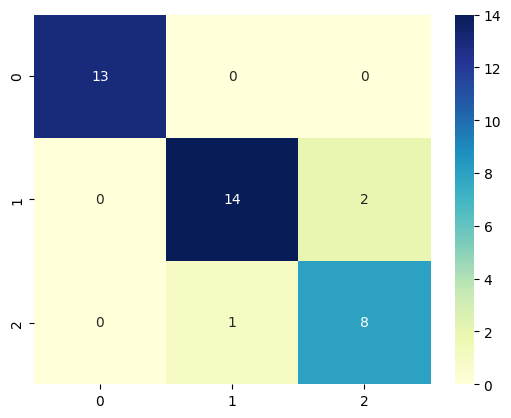

In [9]:
from sklearn.metrics import confusion_matrix
import seaborn as sbs
print(confusion_matrix(y_test, y_pred_test))
confusion_matrix = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix)
sbs.heatmap(confusion_matrix, annot=True, fmt='d', cmap='YlGnBu')



# Overfitting and overfitting

In [10]:
print('Training set score: {:.4f}'.format(knn_classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(knn_classifier.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9211


# Validation curve

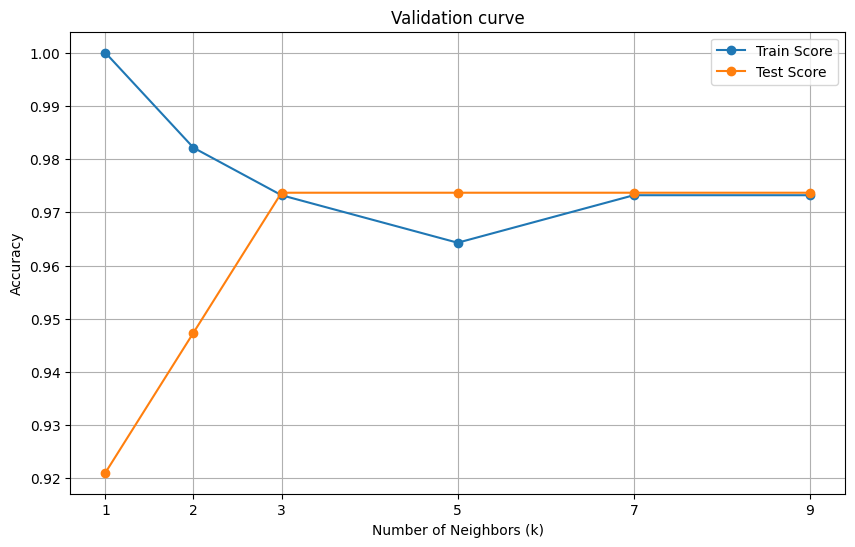

In [12]:
import matplotlib.pyplot as plt
k_values = [1, 2, 3, 5, 7, 9]
train_scores = []
test_scores = []

# Loop through different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Calculate the training and testing scores
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)

    # Append scores to the lists
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plot the scores vs. k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Score', marker='o')
plt.plot(k_values, test_scores, label='Test Score', marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Validation curve')
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()

We have a greater test set score, this means that

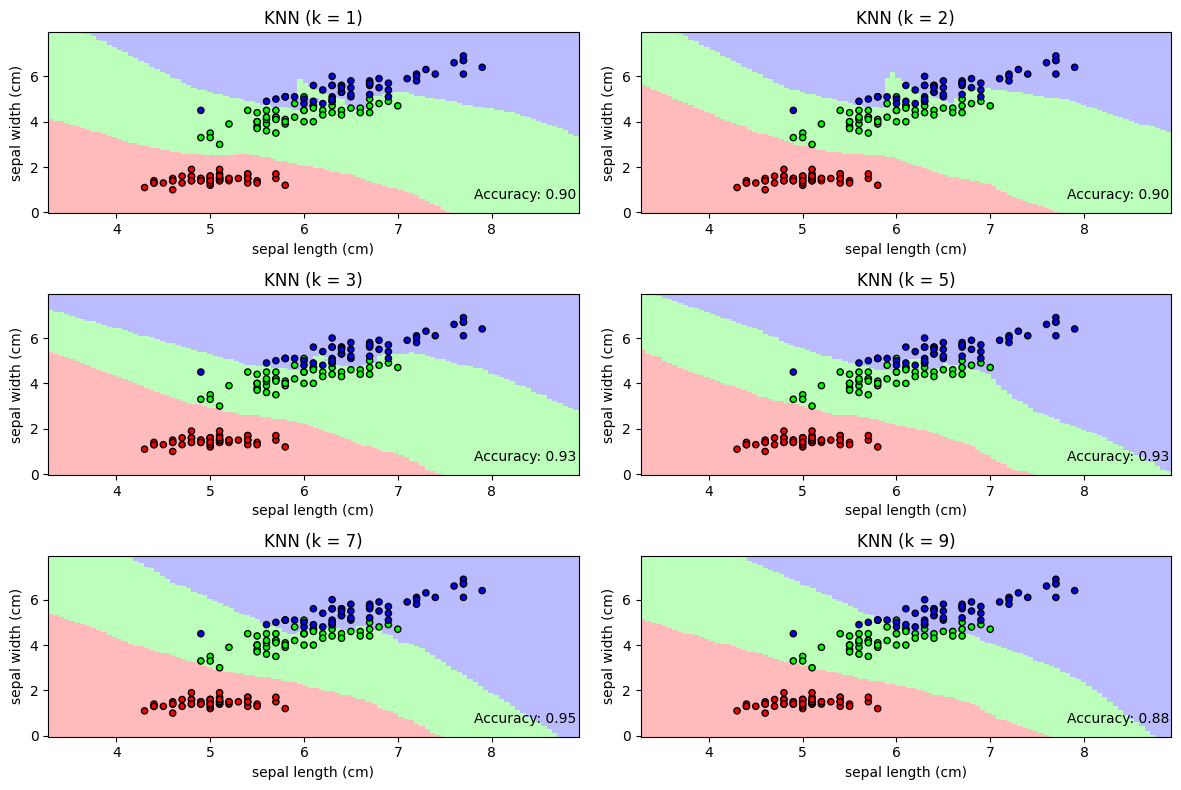

In [13]:
#code modified from sklearn

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define a list of different k values to explore
k_values = [1, 2, 3, 5, 7, 9]

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target
feature_names = dataset.feature_names[:2]

# We only take two features. We could avoid this ugly
X = X[:, [0, 2]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.7, random_state=42
)

h = 0.01  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

# Calculate the number of rows and columns for subplots
num_plots = len(k_values)
num_cols = 2
num_rows = (num_plots + 1) // num_cols  # Ensure there's at least one row

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

for i, n_neighbors in enumerate(k_values):
    name = "KNN"

    clf = Pipeline(
        [
            ("scaler", StandardScaler()),
            ("knn", KNeighborsClassifier(n_neighbors=n_neighbors)),
        ]
    )

    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]

    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        alpha=0.8,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        shading="auto",
    )

    # Plot also the training and testing points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor="k", s=20)
    ax.set_title("{} (k = {})".format(name, n_neighbors))
    ax.text(
        0.9,
        0.1,
        "Accuracy: {:.2f}".format(score),
        size=10,
        ha="center",
        va="center",
        transform=ax.transAxes,
    )

    ax.set_xlabel(feature_names[0])
    ax.set_ylabel(feature_names[1])

# Adjust spacing between subplots
plt.tight_layout()
plt.show()

# Optimization hyperparameters (gridsearch, random search)

In [14]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

list = []
for i in range(2,20):
  kfold = model_selection.KFold(n_splits=i)
  modelCV = knn_classifier
  scoring = 'accuracy'
  results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
  list.append(results.mean())

df = pd.DataFrame({'Number of splits': range(2, 20), 'Score': list})

indice_max = df['Score'].idxmax()
fila_max = df.loc[indice_max]
fila_max


Number of splits    5.000000
Score               0.933333
Name: 3, dtype: float64

**Parameters of K-Nearest Neighbor**


In [17]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9],  # The values of k to search
    'weights': ['uniform', 'distance'],  # Weighting of neighbors
    'p': [1, 2],  # Minkowski distance metric (1 for Manhattan, 2 for Euclidean)
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))


GridSearch CV best score : 0.9556


Parameters that give the best results : 

 {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}


Estimator that was chosen by the search : 

 KNeighborsClassifier(p=1)


**Random search**

In [18]:
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(knn, param_grid, cv=15, scoring='accuracy')

random_search.fit(X, y)

# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(random_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (random_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (random_search.best_estimator_))


GridSearch CV best score : 0.9533


Parameters that give the best results : 

 {'weights': 'uniform', 'p': 2, 'n_neighbors': 3}


Estimator that was chosen by the search : 

 KNeighborsClassifier(n_neighbors=3)
